In [1]:
from tdc.multi_pred import DTI

data = DTI("BindingDB_Ki", print_stats=True)

#help(data)

Downloading...
100%|██████████| 236M/236M [00:34<00:00, 6.79MiB/s] 
Loading...
--- Dataset Statistics ---
174547 unique drugs.
3068 unique targets.
374820 drug-target pairs.
--------------------------
Done!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = data.get_data()

df

,Drug_ID,Drug,Target_ID,Target,Y
0,3081361.0,COc1cc2c(Nc3ccc(Br)cc3F)ncnc2cc1OCC1CCN(C)CC1,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,0.24
1,5327236.0,O=C1N(C/C=C/c2cn[nH]c2)[C@H](Cc2ccccc2)[C@H](O...,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,0.25
2,5327235.0,O=C1N(C/C=C/c2cn[nH]c2)[C@H](Cc2ccccc2)[C@H](O...,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,0.41
3,5327234.0,O=C1N(CCCCCCO)[C@H](Cc2ccccc2)[C@H](O)[C@@H](O...,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,0.80
4,3009319.0,O=C1N(CCCCCO)[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)...,NaN,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,0.99
...,...,...,...,...,...
374815,76325491.0,CC(C)(C)C1CN([C@H]2CC[C@@H](C(=O)Nc3ccc(-c4cc(...,Q15761,MDLELDEYYNKTLATENNTAATRNSDFPVWDDYKSSVDDLQYFLIG...,4.00
374816,76332712.0,C[C@@H]1CN([C@H]2CC[C@@H](C(=O)Nc3ccc(-c4cc(F)...,Q15761,MDLELDEYYNKTLATENNTAATRNSDFPVWDDYKSSVDDLQYFLIG...,3.00
374817,46913706.0,O=C1CCCCN1[C@H]1CC[C@@H](C(=O)Nc2ccc(-c3cc(F)c...,Q15761,MDLELDEYYNKTLATENNTAATRNSDFPVWDDYKSSVDDLQYFLIG...,2.00
374818,11536299.0,O=c1cc(CCc2ccccc2)oc2cccc(O)c12,P46098,MLLWVQQALLALLLPTLLAQGEARRSRNTTRPALLRLSDYLLTNYR...,2512.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374820 entries, 0 to 374819
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Drug_ID    371956 non-null  float64
 1   Drug       374820 non-null  object 
 2   Target_ID  334573 non-null  object 
 3   Target     374820 non-null  object 
 4   Y          374820 non-null  float64
dtypes: float64(2), object(3)
memory usage: 14.3+ MB


In [4]:
df.describe()

,Drug_ID,Y
count,3.719560e+05,3.748200e+05
mean,4.548919e+07,3.371311e+04
std,3.908911e+07,3.545086e+05
min,7.000000e+00,0.000000e+00
25%,1.078978e+07,9.800000e+00
50%,4.435411e+07,1.230000e+02
75%,6.816294e+07,1.940000e+03
max,1.458662e+08,1.000000e+07


1. Distribution of Affinity Values (Y):

This plot reveals the spread of binding affinities in your dataset. You can use a histogram or a KDE plot:

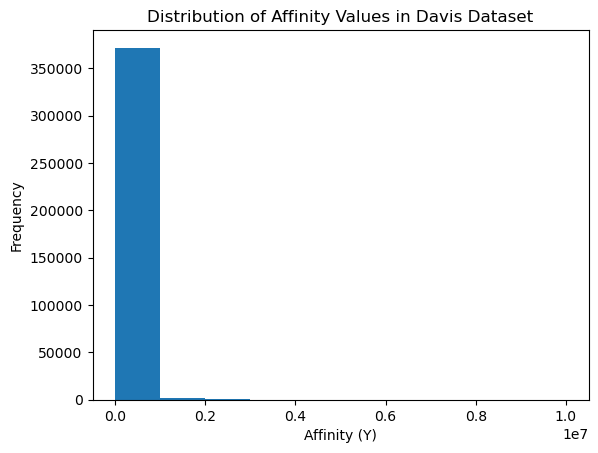

In [5]:
# Assuming 'Y' represents affinity values
plt.hist(df['Y'])
plt.xlabel('Affinity (Y)')
plt.ylabel('Frequency')
plt.title('Distribution of Affinity Values in Davis Dataset')
plt.show()

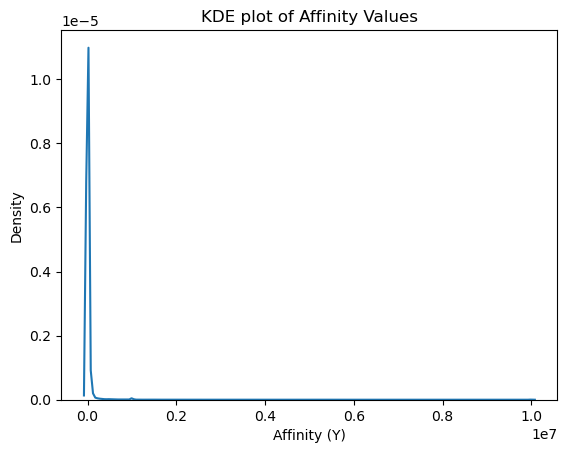

In [6]:
# For Kernel Density Estimation (KDE) plot
sns.kdeplot(df['Y'])  # Using seaborn for KDE plot
plt.xlabel('Affinity (Y)')
plt.ylabel('Density')
plt.title('KDE plot of Affinity Values')
plt.show()

2. Drug Counts per Target:

This plot explores the number of drugs interacting with each target protein. It can reveal potential biases or sparsity:

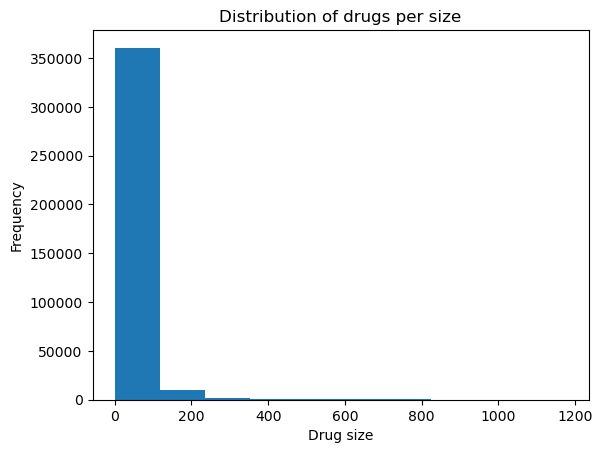

In [7]:
# Assuming 'Target_ID' is your identifier for targets
target_counts = df['Drug'].apply(len)
target_counts.plot(kind='hist', title='Distribution of drugs per size')
plt.xlabel('Drug size')
plt.ylabel('Frequency')
plt.show()

3. Scatter Plot of Affinity (Y) vs. Target Sequence Length (if available):

This plot investigates the relationship between target protein sequence length and binding affinity:

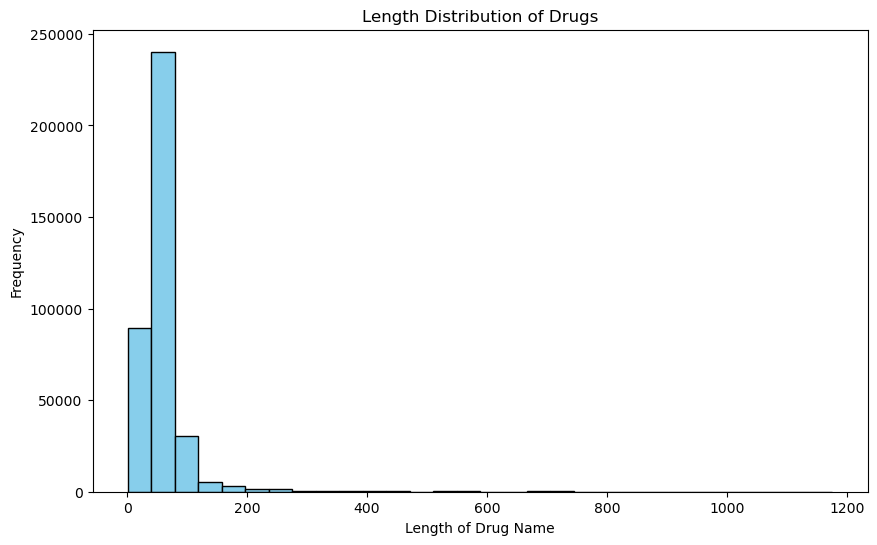

In [8]:
# Assuming 'df' is your DataFrame
df['Drug_length'] = df['Drug'].apply(len)

plt.figure(figsize=(10,6))
plt.hist(df['Drug_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Length Distribution of Drugs')
plt.xlabel('Length of Drug Name')
plt.ylabel('Frequency')
plt.show()

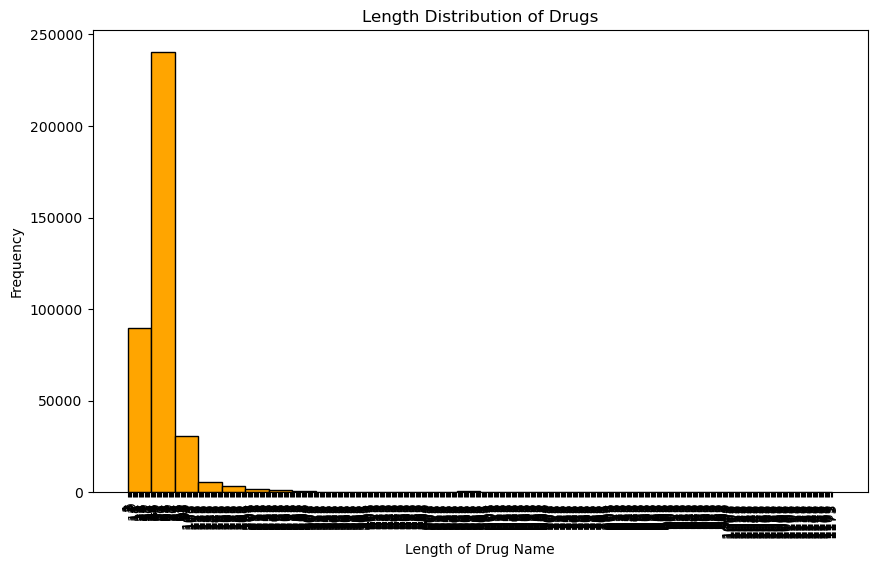

In [9]:
plt.figure(figsize=(10,6))
plt.hist(df['Drug_length'], bins=30, color='orange', edgecolor='black')  # Increase the number of bins to 100
plt.title('Length Distribution of Drugs')
plt.xlabel('Length of Drug Name')
plt.ylabel('Frequency')

# Set xticks to have more labels on x-axis
xticks = range(min(df['Drug_length']), max(df['Drug_length'])+1, 2)
plt.xticks(xticks, rotation=90)

plt.show()

In [10]:
# Assuming you have a column for 'Target_Length'
plt.scatter(df['Target_Length'], df['Y'])
plt.xlabel('Target Sequence Length')
plt.ylabel('Affinity (Y)')
plt.title('Affinity vs. Target Sequence Length')
plt.show()

KeyError: 'Target_Length'

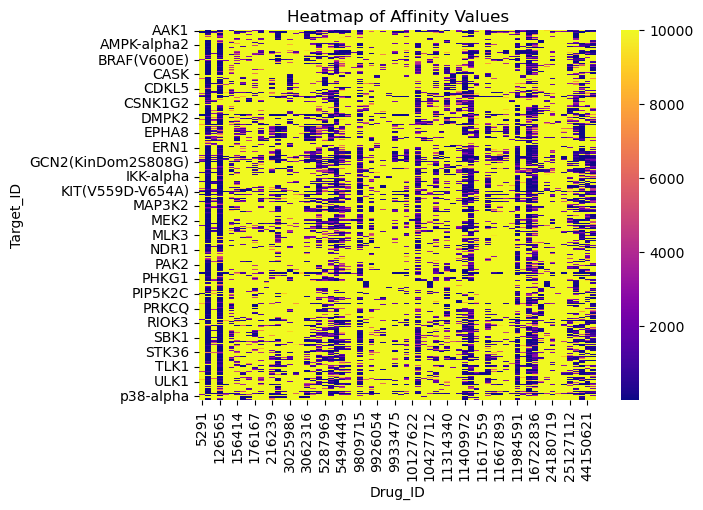

In [ ]:
# Assuming 'Drug_ID' and 'Target_ID' are for rows and columns
pivot_table = pd.pivot_table(df, values='Y', index='Target_ID', columns='Drug_ID')
sns.heatmap(pivot_table, cmap='plasma')  # Using seaborn for heatmap
plt.title('Heatmap of Affinity Values')
plt.show()